# MLP


In [39]:
# Importing all the necessary packages 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
import math
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [2]:
# Loading the dataset 
data=pd.read_csv('data.csv')

In [3]:
data.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [4]:
data.columns

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

In [5]:
# Lets check the dimension of the data set 
data.shape

(400, 24)

In [6]:
data.isnull().any()

Age            False
Duration       False
Frequency      False
Location       False
Character      False
Intensity      False
Nausea         False
Vomit          False
Phonophobia    False
Photophobia    False
Visual         False
Sensory        False
Dysphasia      False
Dysarthria     False
Vertigo        False
Tinnitus       False
Hypoacusis     False
Diplopia       False
Defect         False
Ataxia         False
Conscience     False
Paresthesia    False
DPF            False
Type           False
dtype: bool

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [8]:
data.isna().any()

Age            False
Duration       False
Frequency      False
Location       False
Character      False
Intensity      False
Nausea         False
Vomit          False
Phonophobia    False
Photophobia    False
Visual         False
Sensory        False
Dysphasia      False
Dysarthria     False
Vertigo        False
Tinnitus       False
Hypoacusis     False
Diplopia       False
Defect         False
Ataxia         False
Conscience     False
Paresthesia    False
DPF            False
Type           False
dtype: bool

In [9]:
data.describe()


,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000
mean,31.705000,1.610000,2.365000,0.972500,0.977500,2.47000,0.987500,0.322500,0.977500,0.980000,...,0.0025,0.125000,0.060000,0.015000,0.005000,0.015000,0.0,0.017500,0.007500,0.410000
std,12.139043,0.770964,1.675947,0.268186,0.277825,0.76849,0.111242,0.468019,0.148489,0.140175,...,0.0500,0.331133,0.237784,0.121705,0.070622,0.121705,0.0,0.131289,0.086385,0.492449
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.000000,2.000000,4.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [10]:
data.isnull().sum()

Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64

In [11]:
data['Type'].value_counts

<bound method IndexOpsMixin.value_counts of 0      Typical aura with migraine
1      Typical aura with migraine
2      Typical aura with migraine
3      Typical aura with migraine
4      Typical aura with migraine
                  ...            
395             Basilar-type aura
396             Basilar-type aura
397             Basilar-type aura
398             Basilar-type aura
399             Basilar-type aura
Name: Type, Length: 400, dtype: object>

In [12]:
data['Type'].unique()

array(['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine'], dtype=object)

In [13]:
pd.get_dummies(data.Type)

,Basilar-type aura,Familial hemiplegic migraine,Migraine without aura,Other,Sporadic hemiplegic migraine,Typical aura with migraine,Typical aura without migraine
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
395,1,0,0,0,0,0,0
396,1,0,0,0,0,0,0
397,1,0,0,0,0,0,0
398,1,0,0,0,0,0,0


In [14]:
data.head

<bound method NDFrame.head of      Age  Duration  Frequency  Location  Character  Intensity  Nausea  Vomit  \
0     30         1          5         1          1          2       1      0   
1     50         3          5         1          1          3       1      1   
2     53         2          1         1          1          2       1      1   
3     45         3          5         1          1          3       1      0   
4     53         1          1         1          1          2       1      0   
..   ...       ...        ...       ...        ...        ...     ...    ...   
395   39         1          1         1          1          3       1      1   
396   20         3          2         1          1          3       1      0   
397   28         3          2         1          1          3       1      0   
398   20         3          1         1          1          3       1      0   
399   37         1          1         1          1          3       1      1   

     Phon

Text(0.5, 1.0, 'Frequency of different Types')

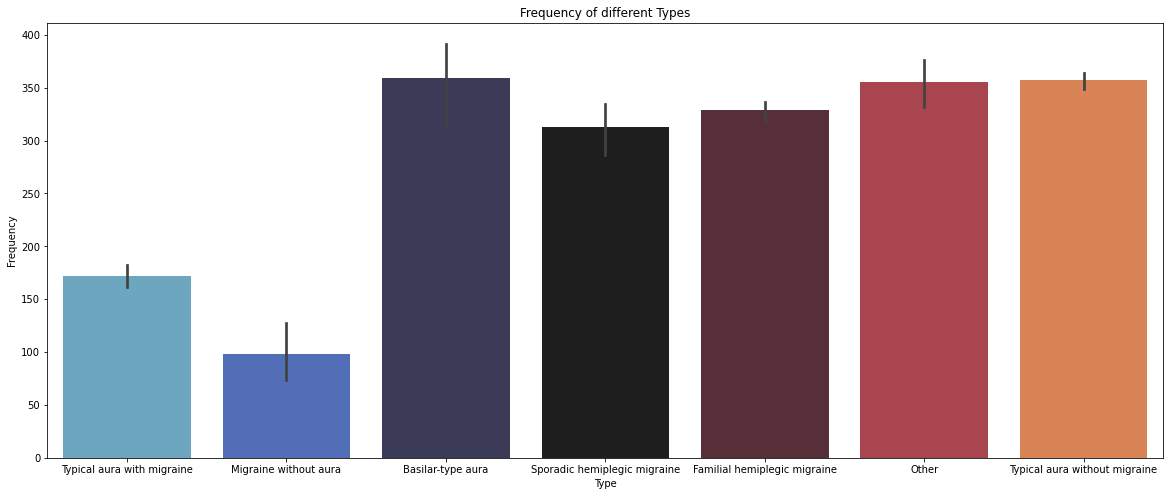

In [15]:
a=np.arange(1,401)
ax=plt.figure(figsize=(20,8))
sns.barplot(x='Type',y=a,data=data,palette='icefire')
plt.ylabel('Frequency')
plt.title('Frequency of different Types')

<AxesSubplot:>

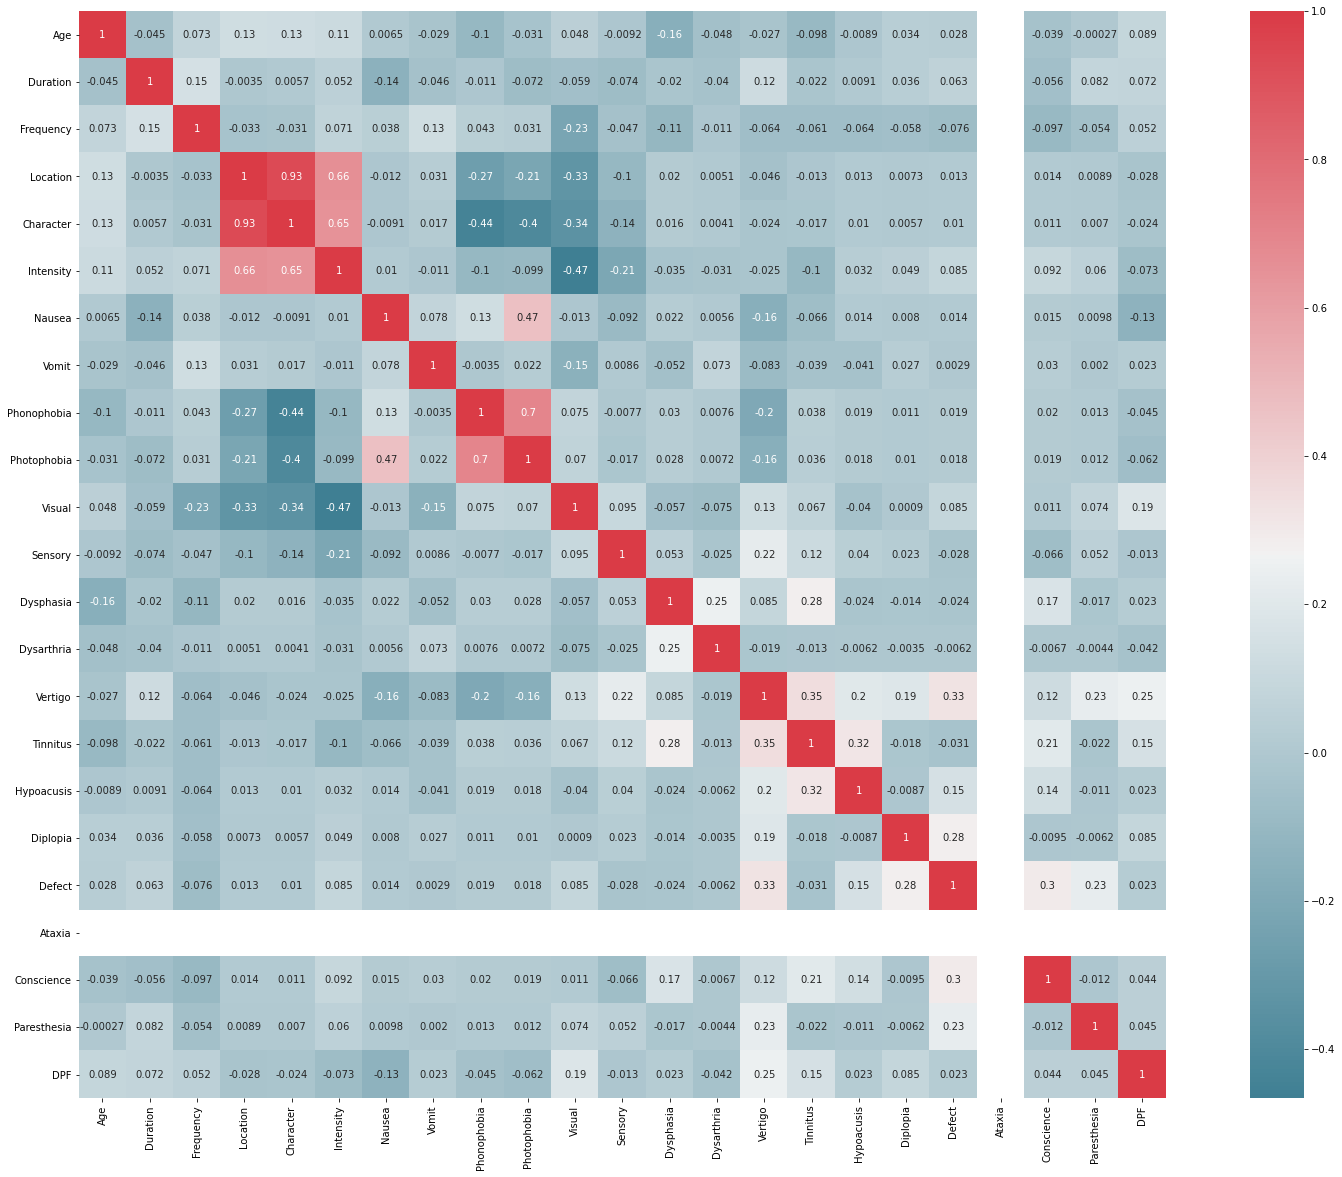

In [16]:
corrMatrix = data.corr()
f, ax = plt.subplots(figsize=(30, 20))
corr = data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corrMatrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In [17]:
data.drop(['Ataxia'],1,inplace=True)

<AxesSubplot:xlabel='Age'>

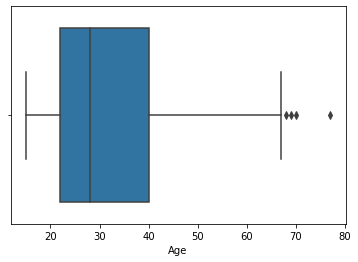

In [18]:
sns.boxplot(x=data["Age"])

In [19]:
data['Age']=data['Age'].clip(lower=data['Age'].quantile(0), upper=data['Age'].quantile(0.99))


<AxesSubplot:xlabel='Age'>

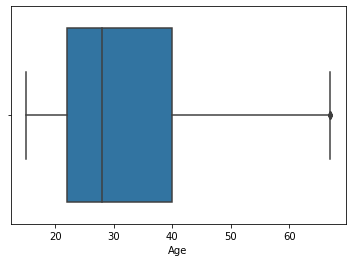

In [20]:
sns.boxplot(x=data["Age"])

In [21]:
x=data.drop(['Type'],1)
y=data['Type'].copy()

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 101)


In [23]:
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(xtrain)
X_test_scale = scaler.transform(xtest)

# K Nearest Neighbor(KNN)

In [24]:
kRange = range(1,15,1)
scores_list = []
for i in kRange:
    knn =  KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scale,ytrain)
    ypredr = knn.predict(X_test_scale)
Accuracy_KNN=accuracy_score(ypredr, ytest)
print('accuracy',Accuracy_KNN)

accuracy 0.8375


                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.33      0.50         3
 Familial hemiplegic migraine       0.00      0.00      0.00         6
        Migraine without aura       1.00      1.00      1.00         9
                        Other       1.00      0.25      0.40         4
 Sporadic hemiplegic migraine       0.00      0.00      0.00         2
   Typical aura with migraine       0.83      1.00      0.90        52
Typical aura without migraine       1.00      1.00      1.00         4

                     accuracy                           0.84        80
                    macro avg       0.69      0.51      0.54        80
                 weighted avg       0.79      0.84      0.79        80



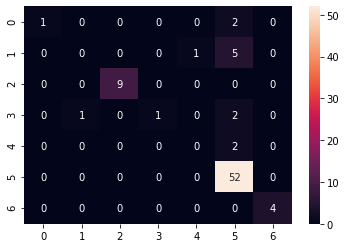

In [43]:
cm_test = confusion_matrix(ytest,ypredr)
sns.heatmap(cm_test,annot=True,fmt='d')
print(classification_report(ytest, ypredr))

# Decision Tree

In [25]:
D_Tree = DecisionTreeClassifier(random_state=32, criterion="entropy", max_depth = 5)
X_trainset_DT, X_testset_DT, y_trainset_DT, y_testset_DT = train_test_split(x, y, test_size=0.2, random_state=2)

D_Tree.fit(X_trainset_DT,y_trainset_DT)
predTree = D_Tree.predict(X_testset_DT)
Accuracy_DT = metrics.accuracy_score(y_testset_DT, predTree)
print("DecisionTrees's Accuracy: ", Accuracy_DT)

DecisionTrees's Accuracy:  0.85


/Users/muhammadusman/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                               precision    recall  f1-score   support

            Basilar-type aura       0.43      0.60      0.50         5
 Familial hemiplegic migraine       0.00      0.00      0.00         5
        Migraine without aura       1.00      1.00      1.00        12
                        Other       0.00      0.00      0.00         2
 Sporadic hemiplegic migraine       0.00      0.00      0.00         2
   Typical aura with migraine       0.88      0.98      0.93        52
Typical aura without migraine       1.00      1.00      1.00         2

                     accuracy                           0.85        80
                    macro avg       0.47      0.51      0.49        80
                 weighted avg       0.77      0.85      0.81        80



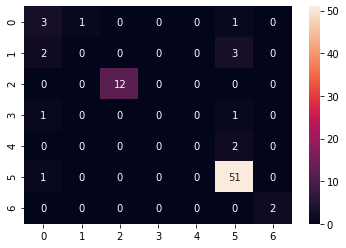

In [44]:
cm_test = confusion_matrix(y_testset_DT,predTree)
sns.heatmap(cm_test,annot=True,fmt='d')
print(classification_report(y_testset_DT, predTree))

# Support Vector Machine

In [26]:
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(x, y, test_size=0.2, random_state=4)
clf = svm.SVC(kernel='linear', C = 1)
clf.fit(X_train_SVM, y_train_SVM) 
yhat = clf.predict(X_test_SVM)
Accuracy_SVM=accuracy_score(y_test_SVM,yhat)
print('accuracy',Accuracy_SVM)


accuracy 0.95


In [27]:
#X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(x, y, test_size=0.2, random_state=4)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,100], 'gamma': [1,0.5,0.1,0.01,0.001,0.005]} 
gridsvc = GridSearchCV(svm.SVC(),param_grid,refit=True,n_jobs=1,verbose=2)
gridsvc.fit(X_train_scale,ytrain)
grid_predictions = gridsvc.predict(X_test_scale)
Accuracy_grid_SVM=accuracy_score(grid_predictions, ytest)
print('accuracy',Accuracy_grid_SVM)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=0.001, gamma=1 ................................................
[CV] ................................. C=0.001, gamma=1, total=   0.0s
[CV] C=0.001, gamma=1 ................................................
[CV] ................................. C=0.001, gamma=1, total=   0.0s
[CV] C=0.001, gamma=1 ................................................
[CV] ................................. C=0.001, gamma=1, total=   0.0s
[CV] C=0.001, gamma=1 ................................................
[CV] ................................. C=0.001, gamma=1, total=   0.0s
[CV] C=0.001, gamma=1 ................................................
[CV] ................................. C=0.001, gamma=1, total=   0.0s
[CV] C=0.001, gamma=0.5 ..............................................
[CV] ............................... C=0.001, gamma=0.5, total=   0.0s
[CV] C=0.001, gamma=0.5 ..............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=0.5 ...............................................
[CV] ................................ C=0.01, gamma=0.5, total=   0.0s
[CV] C=0.01, gamma=0.5 ...............................................
[CV] ................................ C=0.01, gamma=0.5, total=   0.0s
[CV] C=0.01, gamma=0.5 ...............................................
[CV] ................................ C=0.01, gamma=0.5, total=   0.0s
[CV] C=0.01, gamma=0.5 ...............................................
[CV] ................................ C=0.01, gamma=0.5, total=   0.0s
[CV] C=0.01, gamma=0.5 ...............................................
[CV] ................................ C=0.01, gamma=0.5, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] .

[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=0.5 ..................................................
[CV] ................................... C=1, gamma=0.5, total=   0.0s
[CV] C=1, gamma=0.5 ..................................................
[CV] ................................... C=1, gamma=0.5, total=   0.0s
[CV] C=1, gamma=0.5 ..................................................
[CV] ................................... C=1, gamma=0.5, total=   0.0s
[CV] C=1, gamma=0.5 ..................................................
[CV] ................................... C=1, gamma=0.5, total=   0.0s
[CV] C=1, gamma=0.5 ..................................................
[CV] ................................... C=1, gamma=0.5, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    1.3s finished


                               precision    recall  f1-score   support

            Basilar-type aura       0.75      1.00      0.86         3
 Familial hemiplegic migraine       0.57      0.67      0.62         6
        Migraine without aura       0.89      0.89      0.89         9
                        Other       0.80      1.00      0.89         4
 Sporadic hemiplegic migraine       1.00      0.50      0.67         2
   Typical aura with migraine       0.96      0.92      0.94        52
Typical aura without migraine       1.00      1.00      1.00         4

                     accuracy                           0.90        80
                    macro avg       0.85      0.85      0.84        80
                 weighted avg       0.91      0.90      0.90        80



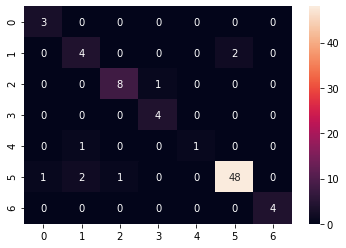

In [45]:
cm_test = confusion_matrix(ytest,grid_predictions)
sns.heatmap(cm_test,annot=True,fmt='d')
print(classification_report(ytest, grid_predictions))

In [28]:
gridsvc.best_params_

{'C': 100, 'gamma': 0.01}

# Logistic Regression

In [29]:
X_train_LR, X_test__LR, y_train__LR, y_test__LR = train_test_split(x, y, test_size=0.2, random_state=3)
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_LR,y_train__LR)
yhat_LR = LR.predict(X_test__LR)
Accuracy_LR=accuracy_score(y_test__LR,yhat_LR)
print('accuracy',Accuracy_LR)

accuracy 0.7


                               precision    recall  f1-score   support

            Basilar-type aura       0.00      0.00      0.00         1
 Familial hemiplegic migraine       0.00      0.00      0.00         4
        Migraine without aura       1.00      0.42      0.59        12
                        Other       0.00      0.00      0.00         4
 Sporadic hemiplegic migraine       0.00      0.00      0.00         3
   Typical aura with migraine       0.68      1.00      0.81        51
Typical aura without migraine       0.00      0.00      0.00         5

                     accuracy                           0.70        80
                    macro avg       0.24      0.20      0.20        80
                 weighted avg       0.58      0.70      0.60        80



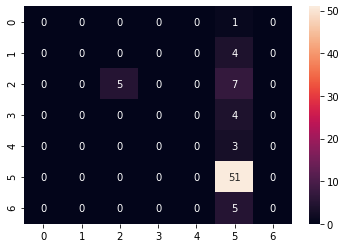

In [46]:
cm_test = confusion_matrix(y_test__LR,yhat_LR)
sns.heatmap(cm_test,annot=True,fmt='d')
print(classification_report(y_test__LR, yhat_LR))

# Random Forest

In [30]:
rfr = RandomForestClassifier(random_state= 32)
rfr.fit(X_train_scale, ytrain)
ypredrfr = rfr.predict(X_test_scale)
Accuracy_RF=accuracy_score(ypredrfr,ytest)
print('accuracy',Accuracy_RF)

accuracy 0.9


                               precision    recall  f1-score   support

            Basilar-type aura       0.75      1.00      0.86         3
 Familial hemiplegic migraine       0.00      0.00      0.00         6
        Migraine without aura       0.90      1.00      0.95         9
                        Other       1.00      0.75      0.86         4
 Sporadic hemiplegic migraine       1.00      0.50      0.67         2
   Typical aura with migraine       0.91      1.00      0.95        52
Typical aura without migraine       1.00      1.00      1.00         4

                     accuracy                           0.90        80
                    macro avg       0.79      0.75      0.75        80
                 weighted avg       0.85      0.90      0.87        80



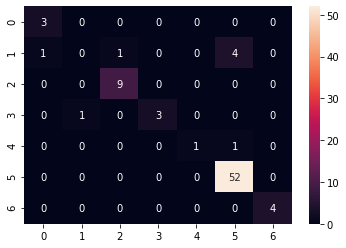

In [47]:
cm_test = confusion_matrix(ytest,ypredrfr)
sns.heatmap(cm_test,annot=True,fmt='d')
print(classification_report(ytest, ypredrfr))

# Multi layer Perceptron

In [31]:
mlp=MLPClassifier()
mlp.fit(X_train_scale, ytrain)
ypredmlp = mlp.predict(X_test_scale)
Accuracy_mlp=accuracy_score(ypredmlp,ytest )
print('accuracy',Accuracy_mlp)


accuracy 0.95


/Users/muhammadusman/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                               precision    recall  f1-score   support

            Basilar-type aura       0.75      1.00      0.86         3
 Familial hemiplegic migraine       1.00      0.67      0.80         6
        Migraine without aura       1.00      1.00      1.00         9
                        Other       1.00      0.75      0.86         4
 Sporadic hemiplegic migraine       1.00      1.00      1.00         2
   Typical aura with migraine       0.94      0.98      0.96        52
Typical aura without migraine       1.00      1.00      1.00         4

                     accuracy                           0.95        80
                    macro avg       0.96      0.91      0.93        80
                 weighted avg       0.95      0.95      0.95        80



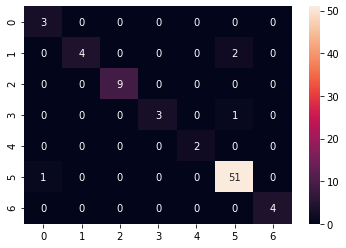

In [48]:
cm_test = confusion_matrix(ytest,ypredmlp)
sns.heatmap(cm_test,annot=True,fmt='d')
print(classification_report(ytest, ypredmlp))

In [32]:
param_grid = {
        'hidden_layer_sizes': [(7, 7), (128,), (128, 7)],
        'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
        'epsilon': [1e-3, 1e-7, 1e-8, 1e-9, 1e-8]
    }
estimator = GridSearchCV(
        MLPClassifier(learning_rate='adaptive', learning_rate_init=1., early_stopping=True, shuffle=True),
        param_grid=param_grid, n_jobs=-1)
estimator.fit(X_train_scale, ytrain)
grid_predictions = estimator.predict(X_test_scale)
Accuracy_grid_mlp=accuracy_score(grid_predictions,ytest)
print('accuracy',Accuracy_grid_mlp)

accuracy 0.9


In [33]:
models = pd.DataFrame({
    'Model': ['KNeighborsClassifier','DecisionTreeClassifier','support vector classifier','support vector classifier with gridsearch','Logistic Regression','Random Forest', 'MLPClassifier', 
              'MLPClassifier with gridsearch'],
    'Score': [Accuracy_KNN,Accuracy_DT, Accuracy_SVM, Accuracy_grid_SVM, Accuracy_LR,Accuracy_RF,Accuracy_mlp,Accuracy_grid_mlp]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,support vector classifier with gridsearch,0.9625
2,support vector classifier,0.9500
6,MLPClassifier,0.9500
5,Random Forest,0.9000
7,MLPClassifier with gridsearch,0.9000
1,DecisionTreeClassifier,0.8500
0,KNeighborsClassifier,0.8375
4,Logistic Regression,0.7000


Text(0.5, 1.0, 'Classifiers')

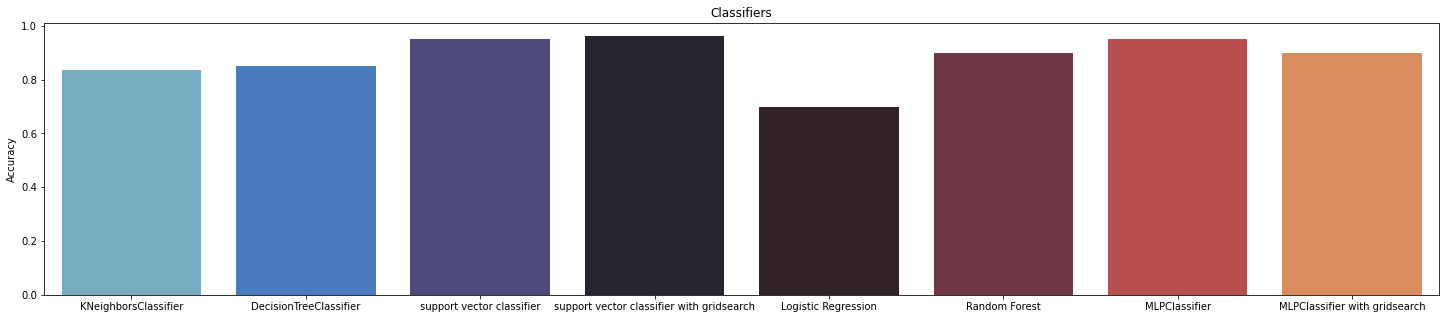

In [37]:
Y=[Accuracy_KNN,Accuracy_DT, Accuracy_SVM, Accuracy_grid_SVM, Accuracy_LR,Accuracy_RF,Accuracy_mlp,Accuracy_grid_mlp]
X=['KNeighborsClassifier','DecisionTreeClassifier','support vector classifier','support vector classifier with gridsearch','Logistic Regression','Random Forest', 'MLPClassifier', 
              'MLPClassifier with gridsearch']
ax=plt.figure(figsize=(25,5))
sns.barplot(x=X,y=Y,palette='icefire')
plt.ylabel('Accuracy')
plt.title('Classifiers')